# Paris House Price Prediction - Regression Problem

## Introduction

This project involves predicting house prices in Paris using a dataset created from imaginary data representing various features of houses in an urban environment. The dataset is ideal for educational purposes, allowing students and practitioners to practice regression modeling and enhance their knowledge in data science.

## Content

The dataset provides a comprehensive view of house attributes, making it suitable for building regression models to predict house prices. Each row represents a house, and each column represents a specific feature of the house.

## Source

This dataset is available on Kaggle in the following link:
> [https://www.kaggle.com/datasets/mssmartypants/paris-housing-price-prediction/data]

## Data Dictionary

All attributes in the dataset are numeric variables, which are described below:

- **squareMeters**: The total area of the house in square meters. This is numeric.
- **numberOfRooms**: The total number of rooms in the house. This is numeric.
- **hasYard**: Indicates whether the house has a yard (1 for yes, 0 for no). This is binary.
- **hasPool**: Indicates whether the house has a swimming pool (1 for yes, 0 for no). This is binary.
- **floors**: The number of floors in the house. This is numeric.
- **cityCode**: The zip code of the area where the house is located. This is numeric.
- **cityPartRange**: Indicates the exclusivity of the neighborhood (the higher the range, the more exclusive the neighborhood).
- **numPrevOwners**: The number of previous owners the house has had. This is numeric.
- **made**: The year the house was built. This is numeric.
- **isNewBuilt**: Indicates whether the house is newly built (1 for yes, 0 for no). This is binary.
- **hasStormProtector**: Indicates whether the house has a storm protector (1 for yes, 0 for no). This is binary.
- **basement**: The size of the basement in square meters. This is numeric.
- **attic**: The size of the attic in square meters. This is numeric.
- **garage**: The size of the garage in square meters. This is numeric.
- **hasStorageRoom**: Indicates whether the house has a storage room (1 for yes, 0 for no). This is binary.
- **hasGuestRoom**: The number of guest rooms in the house. This is numeric.
- **price**: The predicted price of the house (target variable).

## Problem Statement

1. **Exploratory Data Analysis(EDA)** The objective of EDA is to analyze the data and find relationship and pattern present between the features and target variable. This will helps us to find the most significant features for predicting the price of a huse in Paris, France.
2. **Data Cleaning**: Clean the deta to eliminate missing values, duplicate values, unnecessary features so that the data can be efficiently used by the machine learning models.

### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.ensemble import IsolationForest
import ppscore as pps

### Settings

In [2]:
# Warnings
warnings.filterwarnings("ignore")
# Plot
sns.set_style("darkgrid")
# Path
data_path = "../data"
csv_path = os.path.join(data_path, "ParisHousing.csv")
              

### Load Data

In [3]:
df = pd.read_csv(csv_path)

In [4]:
# Show 1st 5 rows of the dataset to get an idea about the data stored in each feature
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [5]:
# Data Description
print("=" * 60)
print("DATA DESCRIPTION")
print("=" * 60)
print(f"Number of observations: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

DATA DESCRIPTION
Number of observations: 10000
Number of features: 17


In [6]:
# Feature Description
print("=" * 60)
print("FEATURE DESCRIPTION")
print("=" * 60)
print(df.dtypes)
# Separate numeric and binary features
num_cols = [col for col in df.columns if df[col].nunique() > 2]
bin_cols = [col for col in df.columns if df[col].nunique() == 2]
print("-" * 60)
print(f"Number of numeric features: {len(num_cols)}")
print(num_cols)
print("-" * 60)
print(f"Number of binary features: {len(bin_cols)}")
print(bin_cols)

FEATURE DESCRIPTION
squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
dtype: object
------------------------------------------------------------
Number of numeric features: 12
['squareMeters', 'numberOfRooms', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'basement', 'attic', 'garage', 'hasGuestRoom', 'price']
------------------------------------------------------------
Number of binary features: 5
['hasYard', 'hasPool', 'isNewBuilt', 'hasStormProtector', 'hasStorageRoom']


In [7]:
# Missing Value Detection
print("=" * 60)
print("MISSING VALUE DETECTION")
print("=" * 60)
if df.isnull().sum().sum() > 0:
    print(df.isnull().sum())
else:
    print("No missing value is present in any feature.")

MISSING VALUE DETECTION
No missing value is present in any feature.


In [8]:
# Duplicate Row Detection
print("=" * 60)
print("DUPLICATE ROW DETECTION")
print("=" * 60)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

DUPLICATE ROW DETECTION
Number of duplicate rows: 0


### Univariate Analysis

- Analyze each individual numerical feature to get an idea about the distribution of values and also check the presence of outliers.
- Analyze each individual binary feature to get an idea about the proportion of data present in that feature.

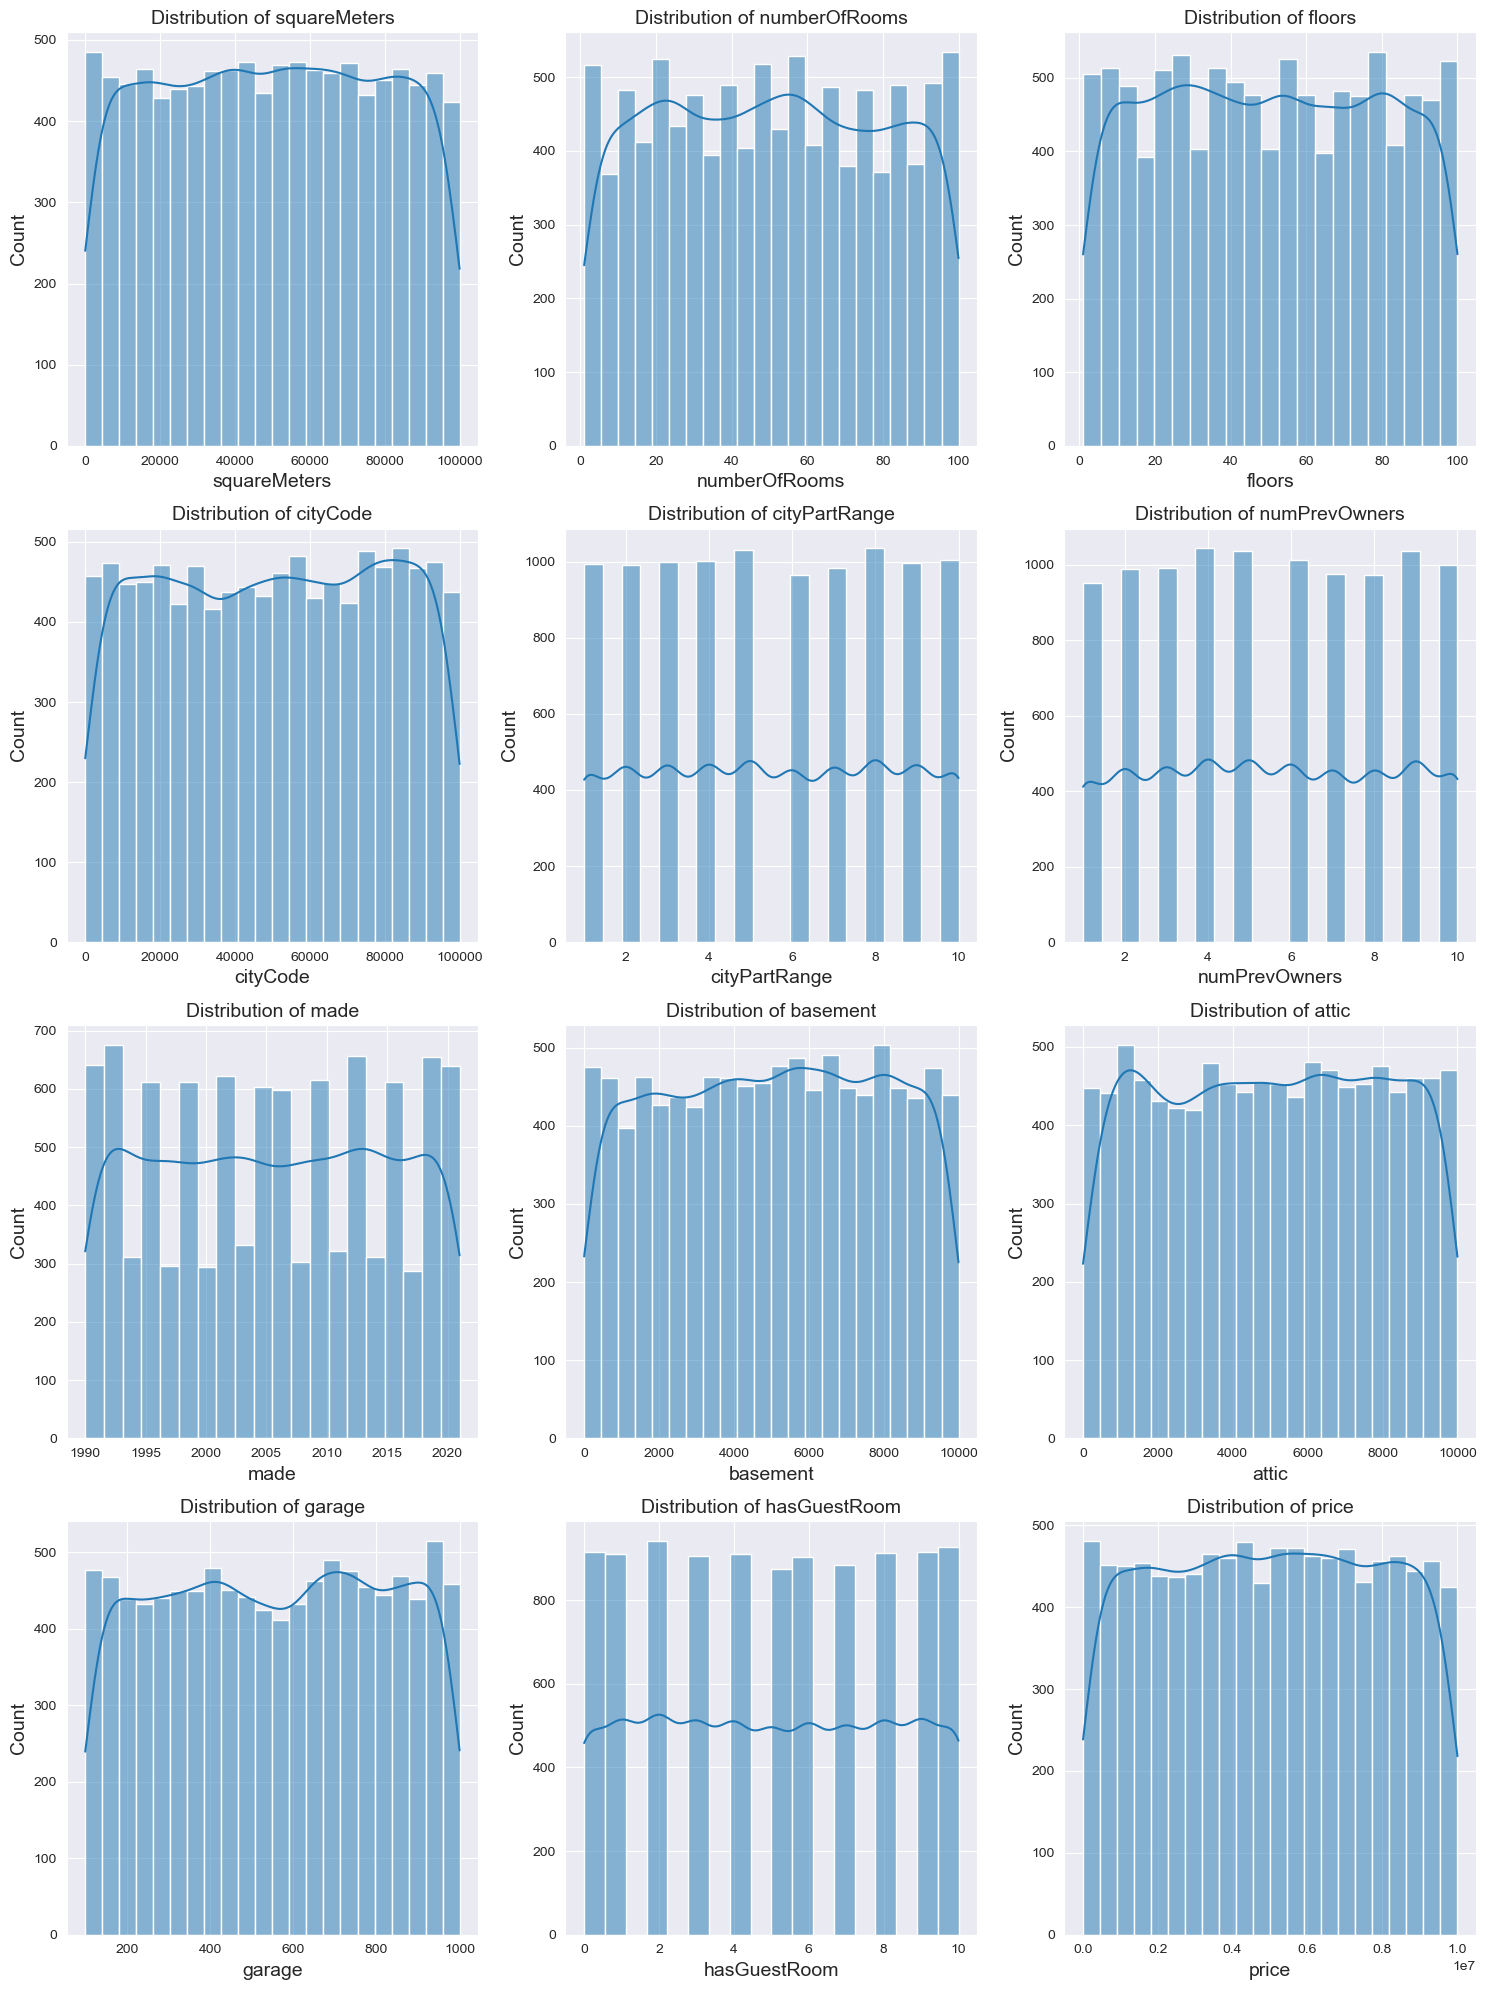

In [9]:
# Histogram analysis of numerical features to visualize the distribution of data in each feature.
fig, axes = plt.subplots(nrows=4, ncols= 3, figsize=(15, 20))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x = col, kde=True, ax= axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize= 14)
    axes[i].set_xlabel(f"{col}", fontsize=14)
    axes[i].set_ylabel("Count", fontsize=14)
plt.tight_layout()
plt.show()


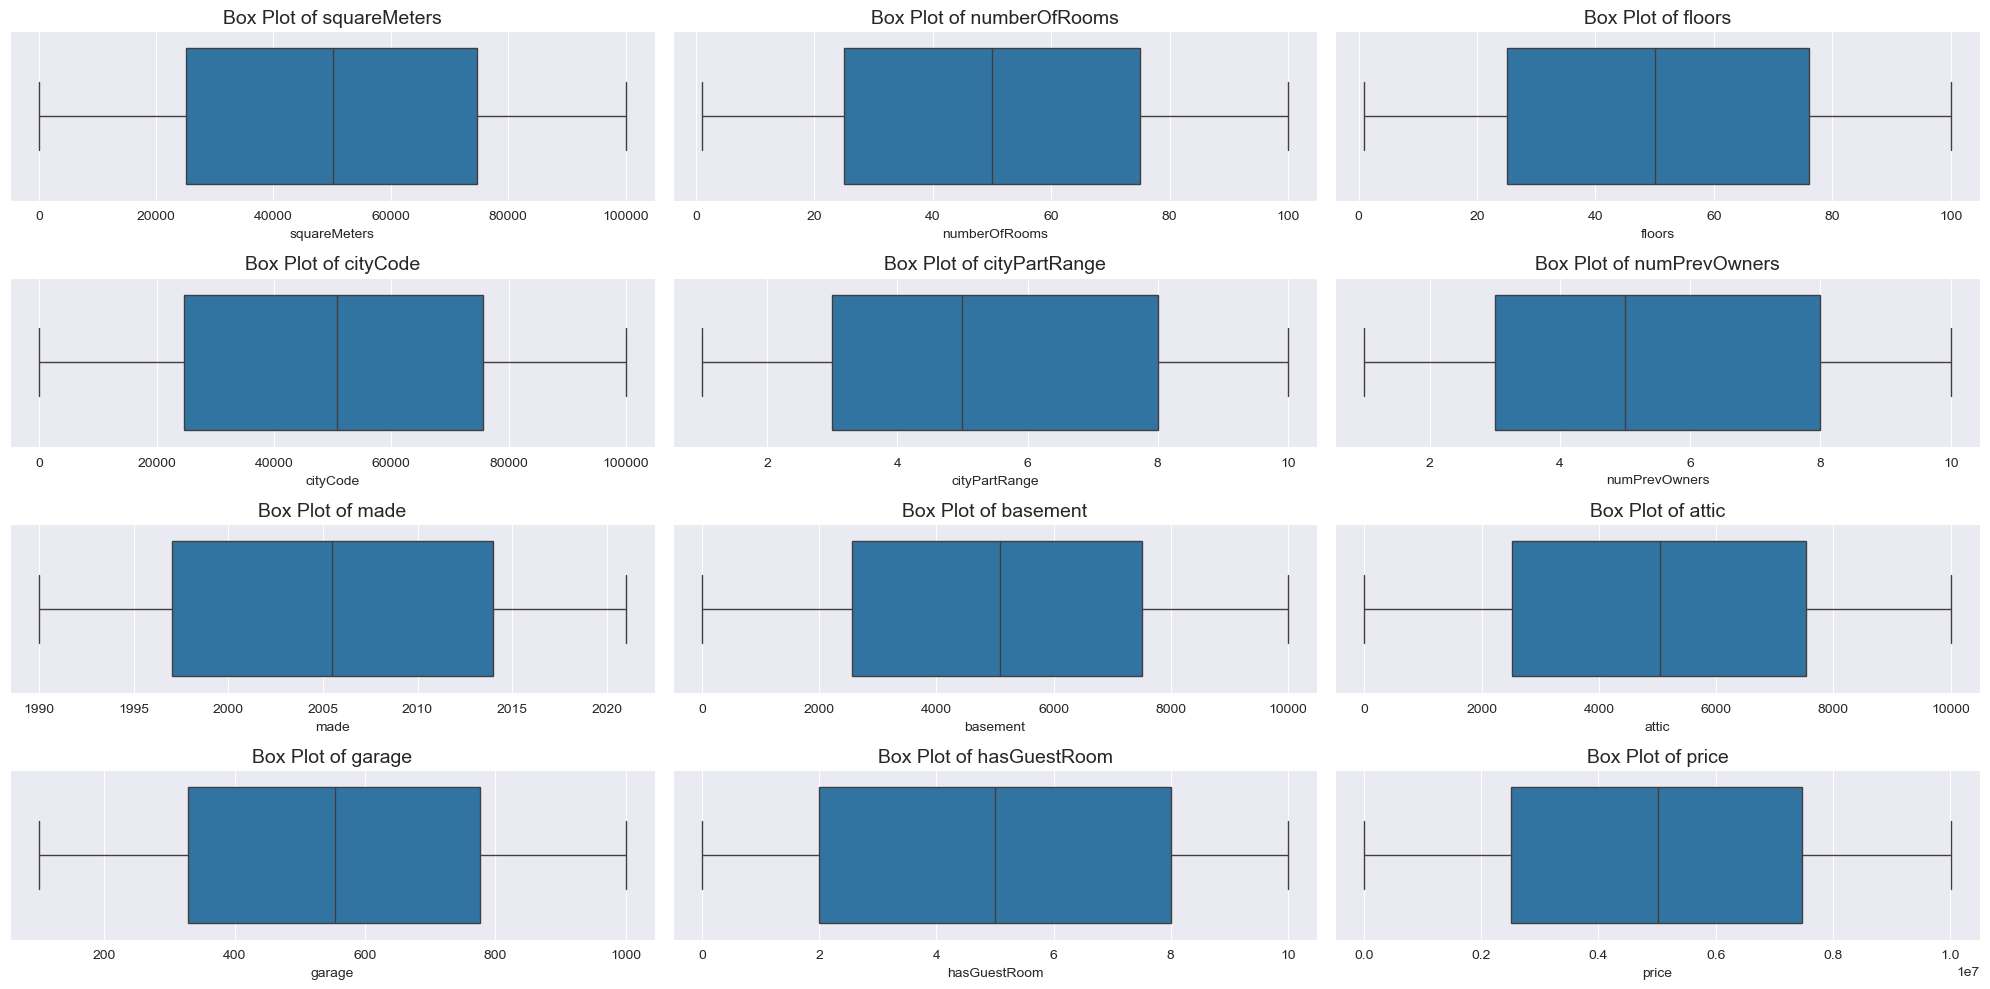

In [10]:
# Box plot analysis to detect the outlier present in each individual feature.
fig, axes = plt.subplots(nrows= 4, ncols= 3, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x= col, ax= axes[i])
    axes[i].set_title(f"Box Plot of {col}", fontsize=14)
plt.tight_layout()
plt.show()

### Key Findings

- From Histogram analysis it is found that all numerical features are almost uniformly distributed.
- From Boxplot analysis it is found that none of the numerical features have any outlier.

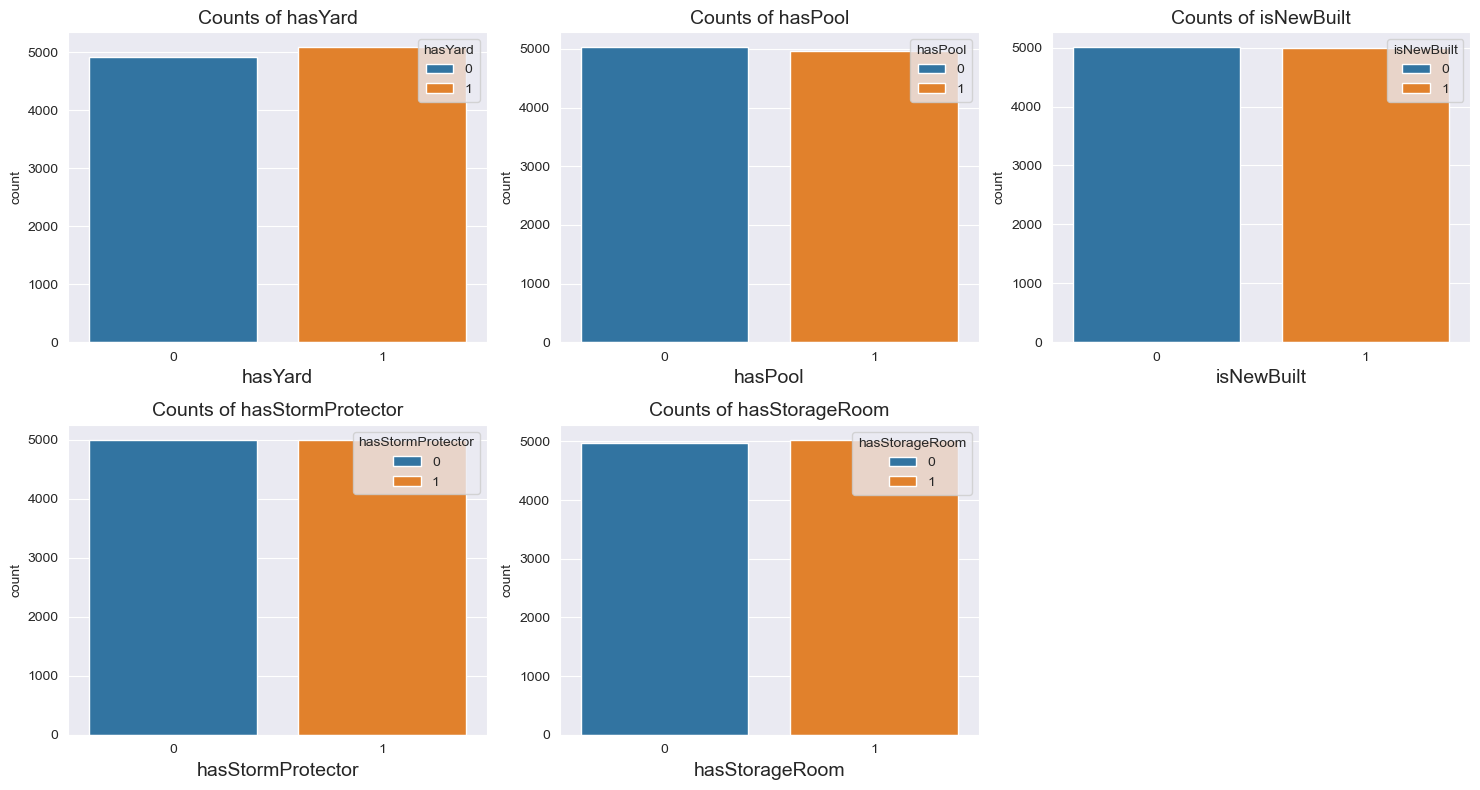

In [11]:
# Count Plot analysis of binary features to get the proportion of distribution.
fig, axes = plt.subplots(nrows= 2, ncols= 3, figsize=(15, 8))
axes = axes.flatten()
for i, col in enumerate(bin_cols):
    sns.countplot(data= df, x= col, hue=col, ax= axes[i])
    axes[i].set_title(f"Counts of {col}", fontsize=14)
    axes[i].set_xlabel(f"{col}", fontsize=14)
plt.tight_layout()
axes[-1].axis("off")
plt.show()

### Key Findings

- From count plot analysis it is found that all the binary features have almost equal count of values.

In [12]:
# Detect outlier rows in the dataset using ensemble technique Isolation Forest
isof = IsolationForest(contamination=0.1, random_state= 42)
isof.fit(df[num_cols])

IsolationForest(contamination=0.1, random_state=42)

In [13]:
# Get the outlier rows
df_with_out = df.copy()
df_with_out["outlier"] = isof.predict(df[num_cols])
outliers = df_with_out[df_with_out["outlier"] == -1]
print("=" * 60)
print("OUTLIER ROW DETECTION")
print("=" * 60)
print(f"Number of outlier rows: {outliers.shape[0]}")

OUTLIER ROW DETECTION
Number of outlier rows: 1000


### Correlation Analysis

- Using Pearson's correlation analysis we find the linear relationship among the numerical features
- Using Predictive Power Score correlation analysis we find the non-linear relationship among the numerical features

In [14]:
# Find Peasson's correlation
corr = df.corr()
corr

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
squareMeters,1.000000,0.009573,-0.006650,-0.005594,0.001109,-0.001541,0.008758,0.016619,-0.007207,-0.010667,0.007480,-0.003960,-0.000588,-0.017246,-0.003486,-0.000623,0.999999
numberOfRooms,0.009573,1.000000,-0.011240,0.017015,0.022244,0.009040,0.008340,0.016766,0.003978,-0.002865,-0.001656,-0.013990,0.012061,0.023188,-0.004760,-0.015529,0.009591
hasYard,-0.006650,-0.011240,1.000000,0.015514,-0.000883,0.006760,0.005023,0.004279,0.002214,-0.008370,-0.007598,-0.008558,-0.003085,-0.004626,-0.009506,-0.007276,-0.006119
hasPool,-0.005594,0.017015,0.015514,1.000000,-0.004006,0.008072,0.014613,-0.006848,0.001894,0.000188,-0.001001,-0.007268,-0.011901,0.004832,0.001238,0.001123,-0.005070
floors,0.001109,0.022244,-0.000883,-0.004006,1.000000,0.002207,-0.004921,0.002463,0.005022,0.002458,-0.008566,0.006228,-0.000270,0.011303,0.003616,-0.021155,0.001654
cityCode,-0.001541,0.009040,0.006760,0.008072,0.002207,1.000000,0.011334,-0.007549,0.009266,-0.000224,-0.004941,0.002652,-0.002019,-0.002208,0.002554,-0.003338,-0.001539
cityPartRange,0.008758,0.008340,0.005023,0.014613,-0.004921,0.011334,1.000000,0.009238,0.007748,-0.001874,0.005224,0.004743,0.010696,-0.001648,-0.011338,-0.007153,0.008813
numPrevOwners,0.016619,0.016766,0.004279,-0.006848,0.002463,-0.007549,0.009238,1.000000,0.006858,-0.017420,0.002522,-0.000862,0.000719,0.020268,0.031707,-0.006082,0.016619
made,-0.007207,0.003978,0.002214,0.001894,0.005022,0.009266,0.007748,0.006858,1.000000,-0.001678,-0.000645,-0.005506,0.013773,0.005687,-0.007868,-0.005431,-0.007210
isNewBuilt,-0.010667,-0.002865,-0.008370,0.000188,0.002458,-0.000224,-0.001874,-0.017420,-0.001678,1.000000,0.003200,-0.015986,0.020127,0.002749,0.007011,0.019895,-0.010643


<Axes: >

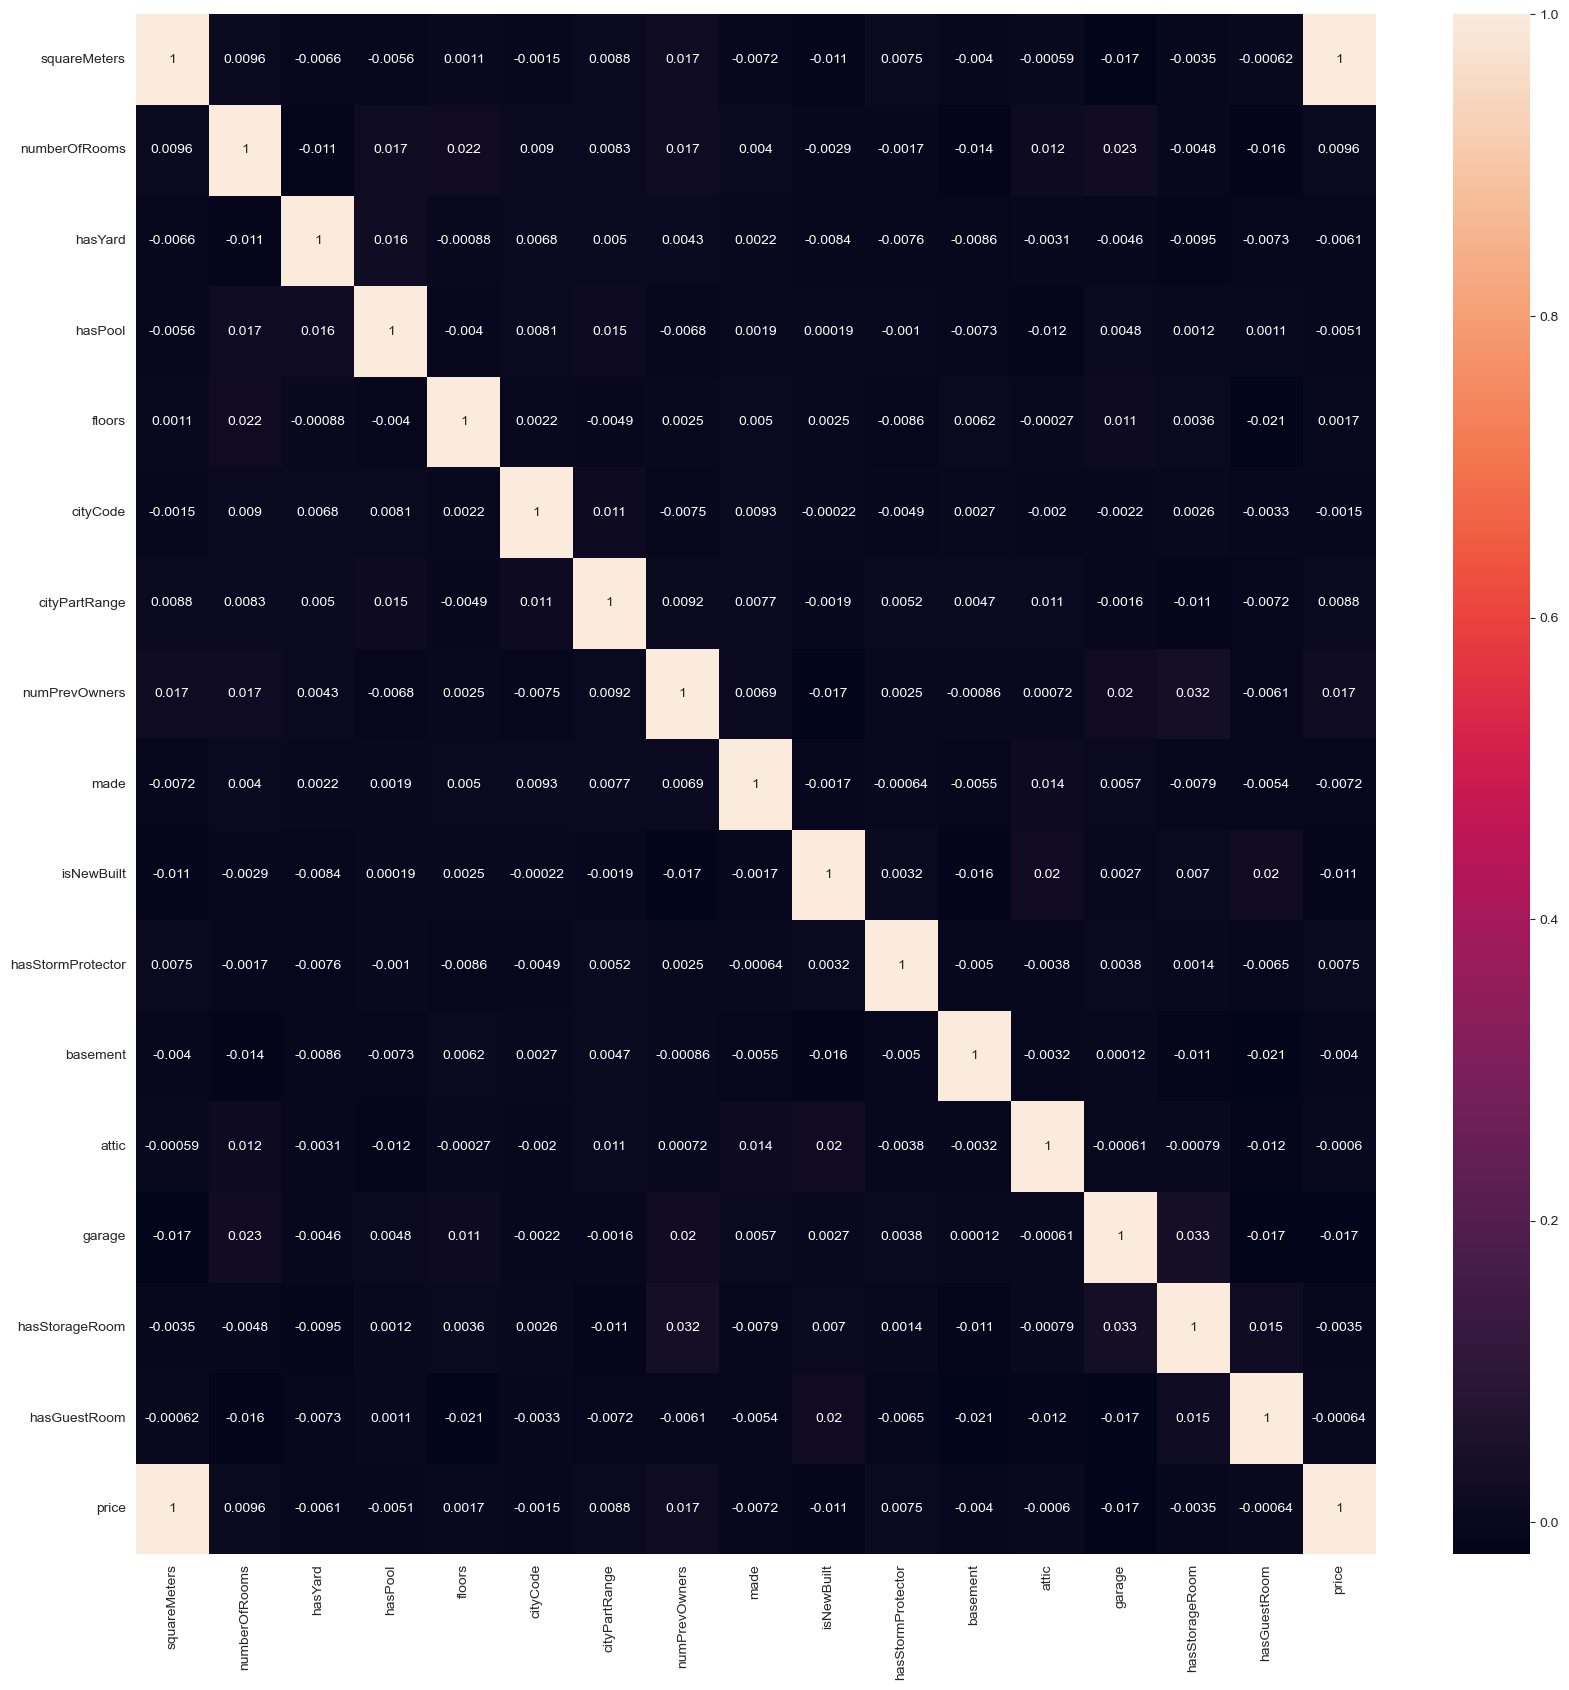

In [15]:
# Visualize the correalation with Heatmap for better understanding
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True)

In [16]:
# Find the Predictive power Score(PPS) for non-linear correlation
pps_matrix = pps.matrix(df)
pps_matrix[(pps_matrix["x"]!= pps_matrix["y"]) & (pps_matrix["ppscore"] >= 0.2)]

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
16,squareMeters,price,0.998420,regression,True,mean absolute error,2.508746e+06,3962.56769,DecisionTreeRegressor()
272,price,squareMeters,0.998433,regression,True,mean absolute error,2.508753e+04,39.31680,DecisionTreeRegressor()


### Key Findings

- From Pearson's correlation analysis it is found that only total area **Squaremeters** has perfect correlation with target variable **Price**, all other features has weak correlation with target variable.
- From Predictive Power Score(PPS) correlation analysis it is found that only total area **Squaremeters** has perfect correlation with target variable **Price**, all other features has weak correlation with target variable.

### Data Cleaning

In [17]:
# Remove Unnecessary features
# Remove cityCode as it contains the zipcode of the city which is not required for price prediction.
df.drop("cityCode", axis= 1, inplace=True)

In [19]:
# Sanity check
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [20]:
# Save the data after removal of unnecessary features
u_path = os.path.join(data_path, "ParisHousing_uf.csv")
df.to_csv(u_path, index=False)

In [21]:
# Remove outliers
indexes = list(outliers.index)
df_out = df.drop(index= indexes, axis= 0)

In [22]:
# Sanity check
df_out.shape

(9000, 16)

In [23]:
# Save the data without outliers
out_path = os.path.join(data_path, "ParisHousing_out.csv")
df_out.to_csv(out_path, index=False)